In [84]:
import psycopg2 as pg
from configparser import ConfigParser
import time
import datetime as dt
import csv # in case we want to export some of the data
import sys,os
import numpy as np
import matplotlib.pyplot as plt

goodlogger_dir = "C:\\Users\\QC\OneDrive - UW-Madison\\Documents\\LabSoftware\\GOOD_logger"

cp = ConfigParser()
cp.read(os.path.join(goodlogger_dir,"my_config.cfg"))
conn_params = {'database':cp['DATABASE_SETUP']['Database'],
                'host':cp['DATABASE_SETUP']['Host'],
                'user':cp['DATABASE_SETUP']['User'],
                'password':cp['DATABASE_SETUP']['Password'],
                'port':cp['DATABASE_SETUP']['Port']}

def get_data_in_time_interval(table, column_names, t_start, t_end):
    database = pg.connect(**conn_params)
    cur = database.cursor()

    t1 = t_start.timestamp()
    t2 = t_end.timestamp() 

    column_names = ['time'] + column_names

    cur.execute(f"SELECT {', '.join(column_names)} FROM {table} where time between {t1} and {t2}")
    row = cur.fetchone()
    rows = []
    while row is not None:
        rows.append([float(x) for x in row])
        row = cur.fetchone()
    return np.array(rows)

def get_data_most_recent(table, column_names, nrows):
    database = pg.connect(**conn_params)
    cur = database.cursor()

    column_names = ['time'] + column_names

    cur.execute(f"SELECT {', '.join(column_names)} FROM {table} ORDER BY time DESC LIMIT {nrows}")
    row = cur.fetchone()
    rows = []
    while row is not None:
        rows.append([float(x) for x in row])
        row = cur.fetchone()
    return np.array(rows)

## examples of getting data

In [80]:
def get_data_in_time_interval(table, column_names, t_start, t_end):
    database = pg.connect(**conn_params)
    cur = database.cursor()

    t1 = t_start.timestamp()
    t2 = t_end.timestamp() 

    column_names = ['time'] + column_names

    cur.execute(f"SELECT {', '.join(column_names)} FROM {table} where time between {t1} and {t2}")
    row = cur.fetchone()
    rows = []
    while row is not None:
        rows.append([float(x) for x in row])
        row = cur.fetchone()
    return np.array(rows)

def get_data_most_recent(table, column_names, nrows):
    database = pg.connect(**conn_params)
    cur = database.cursor()

    column_names = ['time'] + column_names

    cur.execute(f"SELECT {', '.join(column_names)} FROM {table} ORDER BY time DESC LIMIT {nrows}")
    row = cur.fetchone()
    rows = []
    while row is not None:
        rows.append([float(x) for x in row])
        row = cur.fetchone()
    return np.array(rows)

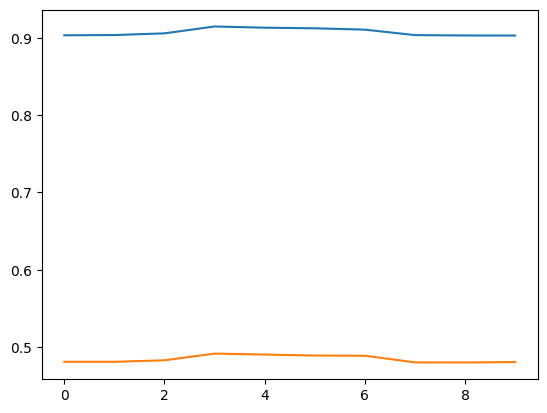

In [81]:
# get 10 most recent rows of data
data =  get_data_most_recent(table='qn_labjack_channels',
                             column_names=['ch1','ch2'],
                             nrows=10)

time, ch1, ch2 = data.transpose() # time is unix time in seconds
plt.plot(ch1)
plt.plot(ch2)

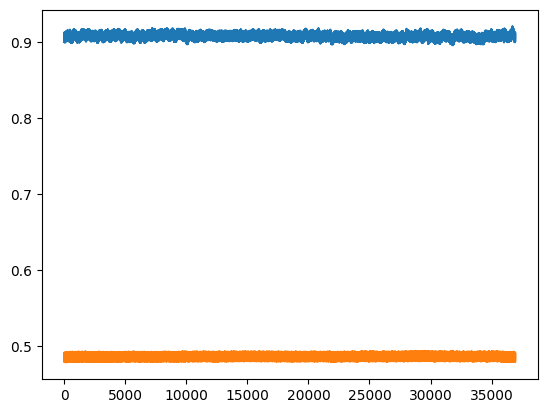

In [82]:
# get rows of data between specified times
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=['ch1','ch2'],
                                t_start=dt.datetime(2023, 10, 10, 16, 48),
                                t_end=dt.datetime.now())

time, ch1, ch2 = data.transpose() # time is unix time in seconds
plt.plot(ch1)
plt.plot(ch2)

## tests - getting data with SQL queries

In [53]:
database = pg.connect(**conn_params)
cur = database.cursor()
cur.execute("SELECT ch1, ch2 FROM qn_labjack_channels ORDER BY time DESC LIMIT 10")
row = cur.fetchone()
rows = [row]
while row is not None:
    print(row)
    row = cur.fetchone()
    rows.append(row)

(Decimal('0.9147892594337463'), Decimal('0.4896602928638458'))
(Decimal('0.914316713809967'), Decimal('0.48816388845443726'))
(Decimal('0.9130566120147705'), Decimal('0.48682504892349243'))
(Decimal('0.9047083854675293'), Decimal('0.4795006513595581'))
(Decimal('0.9043145775794983'), Decimal('0.4790281057357788'))
(Decimal('0.9060472249984741'), Decimal('0.4813120663166046'))
(Decimal('0.9104576110839844'), Decimal('0.4845410883426666'))
(Decimal('0.9147892594337463'), Decimal('0.4893452525138855'))
(Decimal('0.9149467349052429'), Decimal('0.48903021216392517'))
(Decimal('0.9154192805290222'), Decimal('0.4898965358734131'))


In [57]:
database = pg.connect(**conn_params)
cur = database.cursor()

table = 'qn_labjack_channels'
column_names = ['ch1','ch2']
nrows = 10
cur.execute(f"SELECT {', '.join(column_names)} FROM {table} ORDER BY time DESC LIMIT {nrows}")
row = cur.fetchone()
rows = []
while row is not None:
    rows.append([float(x) for x in row])
    row = cur.fetchone()